In [361]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [362]:
import pathlib
data_dir ="/home/selva/Selva/Products/Task/Datas/Images"
data_dir = pathlib.Path(data_dir)

In [363]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

555


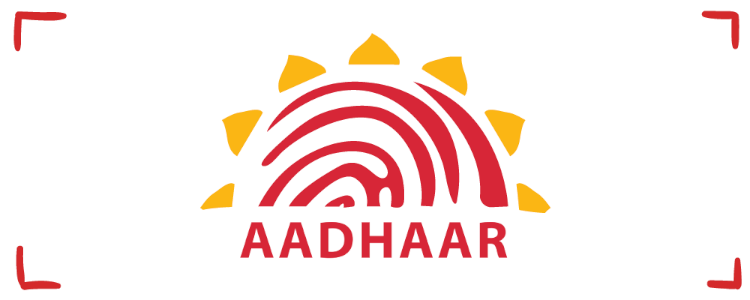

In [365]:
aadharcard = list(data_dir.glob('aadharcard/*'))
PIL.Image.open(str(aadharcard[0]))

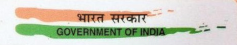

In [366]:
PIL.Image.open(str(aadharcard[1]))


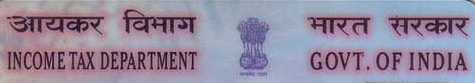

In [367]:
pancard= list(data_dir.glob('pancard/*'))
PIL.Image.open(str(pancard[0]))

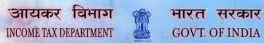

In [368]:
PIL.Image.open(str(pancard[1]))


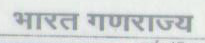

In [369]:
icici_bank = list(data_dir.glob('passport/*'))
PIL.Image.open(str(icici_bank[0]))

In [370]:
batch_size = 32
img_height = 46
img_width = 200

# batch_size = 32
# img_height = 180
# img_width = 200

In [371]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 555 files belonging to 3 classes.
Using 444 files for training.


In [372]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 555 files belonging to 3 classes.
Using 111 files for validation.


In [373]:
class_names = train_ds.class_names
print(class_names)

['aadharcard', 'pancard', 'passport']


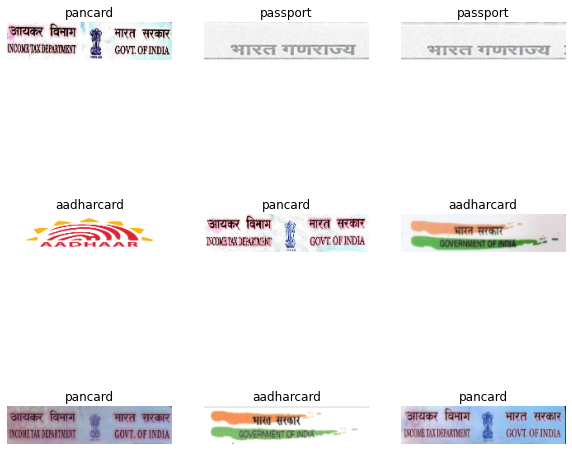

In [374]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [376]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 46, 200, 3)
(32,)


In [377]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [378]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [379]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.04281276 1.0


In [380]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [381]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [382]:
model.summary()


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_26 (Rescaling)     (None, 46, 200, 3)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 46, 200, 16)       448       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 23, 100, 16)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 23, 100, 32)       4640      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 11, 50, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 5, 25, 64)       

In [383]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
14/14 [==============================] - 1s 84ms/step - loss: 1.1228 - accuracy: 0.4955 - val_loss: 0.7279 - val_accuracy: 0.6667
Epoch 2/10
14/14 [==============================] - 1s 82ms/step - loss: 0.3383 - accuracy: 0.8806 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 3/10
14/14 [==============================] - 1s 81ms/step - loss: 0.0569 - accuracy: 0.9797 - val_loss: 0.9165 - val_accuracy: 0.6667
Epoch 4/10
14/14 [==============================] - 1s 81ms/step - loss: 0.2307 - accuracy: 0.9257 - val_loss: 0.0723 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 1s 80ms/step - loss: 0.0708 - accuracy: 0.9820 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 1s 82ms/step - loss: 0.0395 - accuracy: 0.9820 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 1s 83ms/step - loss: 0.0157 - accuracy: 0.9977 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/10
14

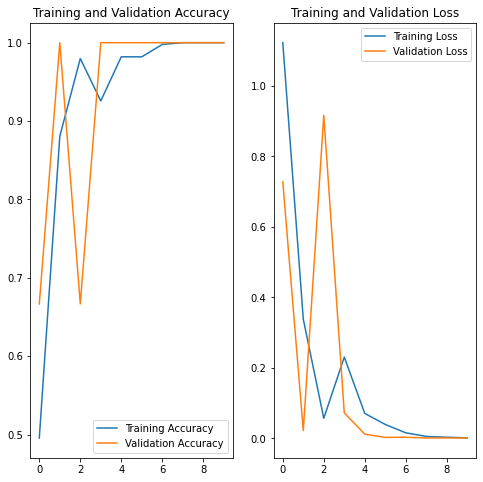

In [385]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [386]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

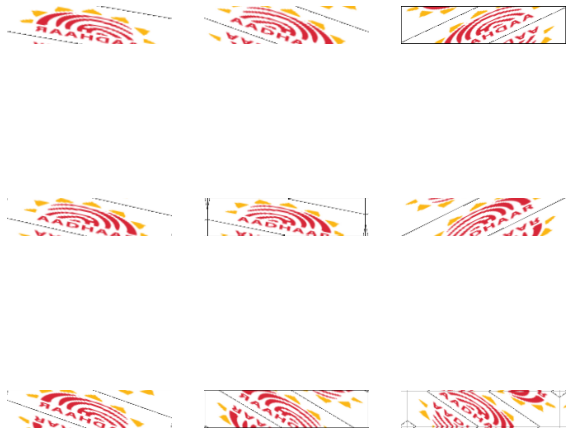

In [387]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [388]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [389]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [390]:
model.summary()


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_26 (Sequential)   (None, 46, 200, 3)        0         
_________________________________________________________________
rescaling_27 (Rescaling)     (None, 46, 200, 3)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 46, 200, 16)       448       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 23, 100, 16)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 23, 100, 32)       4640      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 11, 50, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 50, 64)      

In [391]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
14/14 [==============================] - 1s 95ms/step - loss: 0.9804 - accuracy: 0.5248 - val_loss: 0.4995 - val_accuracy: 0.8108
Epoch 2/15
14/14 [==============================] - 1s 97ms/step - loss: 0.2914 - accuracy: 0.9505 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 3/15
14/14 [==============================] - 1s 91ms/step - loss: 0.0468 - accuracy: 0.9910 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/15
14/14 [==============================] - 1s 92ms/step - loss: 0.0961 - accuracy: 0.9730 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 5/15
14/14 [==============================] - 1s 90ms/step - loss: 0.1266 - accuracy: 0.9640 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 6/15
14/14 [==============================] - 1s 91ms/step - loss: 0.0168 - accuracy: 0.9977 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/15
14/14 [==============================] - 1s 91ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 8/15
14

In [392]:
model.save('/home/selva/Selva/Products/Task/Datas/model/pan_v12.h5')

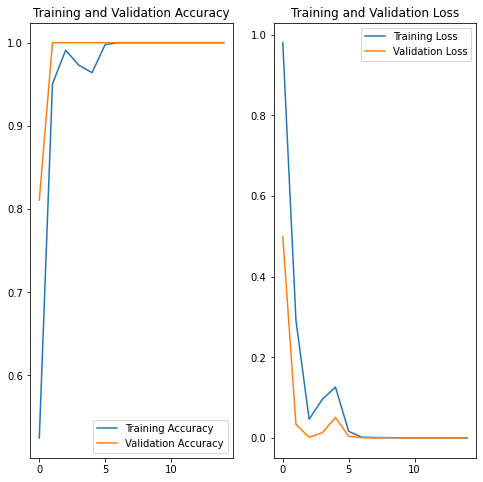

In [393]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [394]:
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
sunflower_path='/home/selva/Selva/Products/Task/Datas/Images/passport/7.png'
img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to passport with a 99.95 percent confidence.


The output is pancard


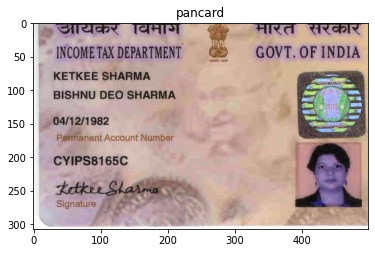

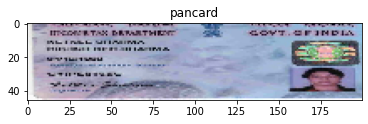

In [441]:
## Model use
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
modelx = load_model('/home/selva/Selva/Products/Task/Datas/model/pan_v12.h5')
import cv2
# class_names=['axis bank', 'icici bank', 'iob bank', 'sbi bank', 'standard chartered bank', 'yes bank']
# class_names=['aadharcard', 'axis bank', 'icici bank', 'iob bank', 'pancard', 'passport', 'sbi bank', 'standard chartered bank', 'yes bank']

class_names=['aadharcard',  'pancard', 'passport']

from keras.models import load_model
from PIL import ImageTk, Image
import numpy as np
import matplotlib.pyplot as plt

file_path=r'/home/selva/Selva/Products/Task/Datas/inputimag/sharma.jpg'

testimg=cv2.imread(file_path)

img = keras.preprocessing.image.load_img(
    file_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelx.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

print('The output is',format(class_names[np.argmax(score)]))
plt.imshow(testimg)
plt.title(str(format(class_names[np.argmax(score)])))
plt.show()

plt.imshow(img)
plt.title(str(format(class_names[np.argmax(score)])))
plt.show()


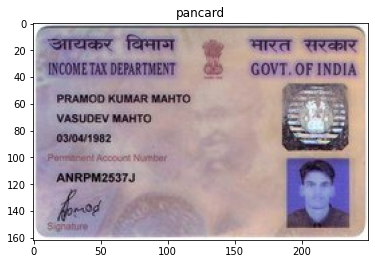

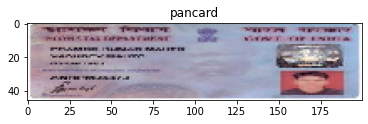

In [427]:
plt.imshow(testimg)
plt.title(str(format(class_names[np.argmax(score)])))
plt.show()

plt.imshow(img)
plt.title(str(format(class_names[np.argmax(score)])))
plt.show()